In [1]:
include("benchFunctions.jl")
using PrettyTables
using Printf

In [14]:
fpf::Int = 64

if fpf == 32
	println("Using Float32 data")
	example_filepath = "resuts_adjoint_GH200_f32.csv";
elseif fpf == 64
	println("Using Float64 data")
	example_filepath = "resuts_adjoint_GH200_f64.csv";
else
	error("fpf must be 32 or 64")
end


my_df = read_special_csv(example_filepath);



Using Float64 data


Top 15 rows with maximum Throughput:




Row,cluster_size,tet_per_block,min_clock,max_clock,mean_clock,se_clock,ci90_clock,min_Throughput,max_Throughput,mean_Throughput,se_Throughput,ci90_Throughput
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4,4,0.184639,0.186468,0.185122,0.000158692,0.000290901,1.33763e8,1.35088e8,1.34737e8,1.14885e5,2.10597e5
2,8,4,0.186037,0.18746,0.186413,0.000135413,0.000248227,1.33056e8,1.34073e8,1.33804e8,96867.2,1.77568e5
3,12,4,0.188469,0.18951,0.188861,0.000118596,0.0002174,1.31616e8,1.32343e8,1.32069e8,82855.7,1.51884e5
4,16,4,0.192192,0.193903,0.192831,0.000150963,0.000276733,1.28634e8,1.2978e8,1.2935e8,101033.0,185205.0
5,1,4,0.194737,0.196748,0.195083,0.000190253,0.000348755,1.26774e8,1.28083e8,1.27857e8,1.23822e5,2.26981e5
6,24,4,0.196816,0.199313,0.19775,0.000232841,0.000426825,1.25143e8,1.26731e8,1.26133e8,1.48099e5,2.71482e5
7,4,6,0.202136,0.203765,0.20243,0.000150597,0.000276062,1.22409e8,1.23395e8,1.23216e8,91160.7,1.67108e5
8,8,6,0.202736,0.205195,0.203691,0.000217683,0.000399037,1.21555e8,1.2303e8,1.22454e8,1.30489e5,2.392e5
9,12,6,0.204899,0.20808,0.206353,0.000315632,0.000578588,1.1987e8,1.21731e8,1.20876e8,1.8467e5,3.38521e5


Figure saved to: ./pdf_plots/throughput_bars_f64.pdf


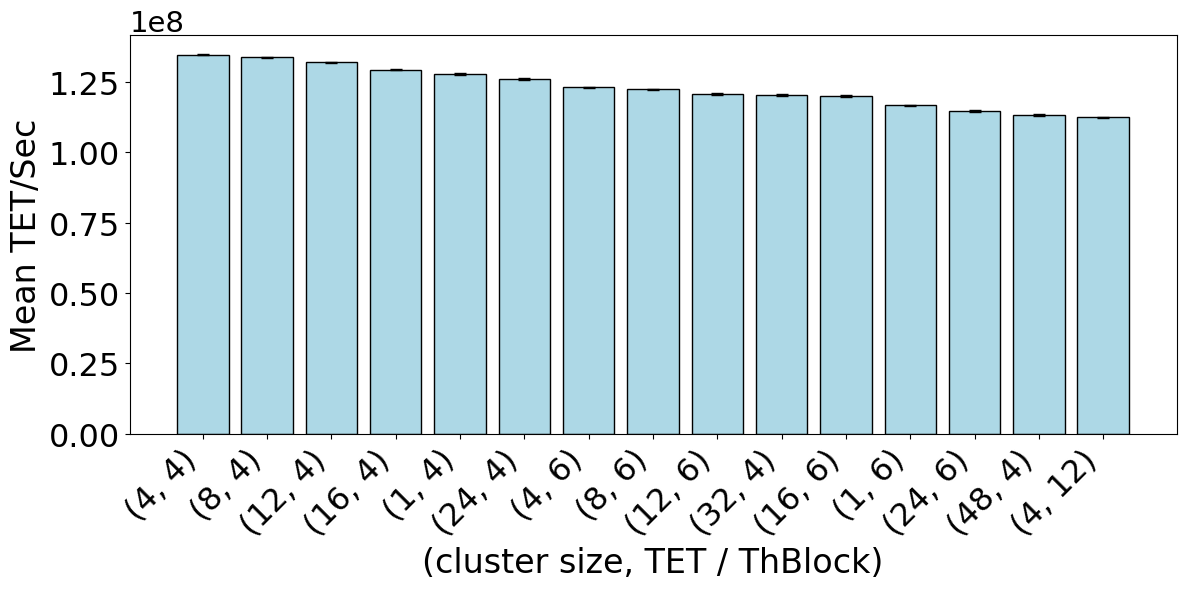

"/home/sriva/git/sfem/workflows/resample/bench_adj/pdf_plots/throughput_bars_f64.pdf"

In [15]:

summary_df = summarize_cluster_stats(my_df);
max_row = col_with_max_Throughput(summary_df);

top = 15
max_row_top = cols_within_max_Throughput(summary_df, top);


println("Top $top rows with maximum Throughput:\n\n");
show(stdout, MIME("text/html"), max_row_top);


picture_th = plot_throughput_bars(max_row_top,
    logy=false,
    fpFormat=fpf,
    fig_size=(12, 6),
    fontsize=24,
    plot_title=false);

if fpf == 32
    save_figure_to_pdf(picture_th, "./pdf_plots/throughput_bars_f32.pdf")
elseif fpf == 64
    save_figure_to_pdf(picture_th, "./pdf_plots/throughput_bars_f64.pdf")
end


In [4]:
summary_df = summarize_cluster_stats(my_df)
println("Cluster stats summary:")
println(summary_df)

Cluster stats summary:
65×12 DataFrame
 Row │ cluster_size  tet_per_block  min_clock  max_clock  mean_clock  se_clock     ci90_clock   min_Throughput  max_Throughput  mean_Throughput  se_Throughput   ci90_Throughput 
     │ Int64         Int64          Float64    Float64    Float64     Float64      Float64      Float64         Float64         Float64          Float64         Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │            1              4   0.153991   0.156251    0.154588  0.000195453  0.000358287       1.59632e8       1.61974e8        1.61351e8       2.0238e5    370986.0
   2 │            1              6   0.163218   0.165091    0.163592  0.000170815  0.000313122       1.51084e8       1.52817e8        1.5247e8        1.57999e5        2.89629e5
   3 │            1              8   0.176484   0.178641    0.176834  0.0002035

In [5]:
# Read specific files
filepaths = ["hex_125.csv", "hex_250.csv", "hex_500.csv"]
data = read_level_csvs(filepaths)

# Combine all data into single DataFrame
combined_df = combine_level_data(data)

data

Dict{String, DataFrame} with 3 entries:
  "hex_125.csv" => 10×2 DataFrame…
  "hex_250.csv" => 20×2 DataFrame…
  "hex_500.csv" => 20×2 DataFrame…

Figure saved to: ./pdf_plots/elements_by_level.pdf


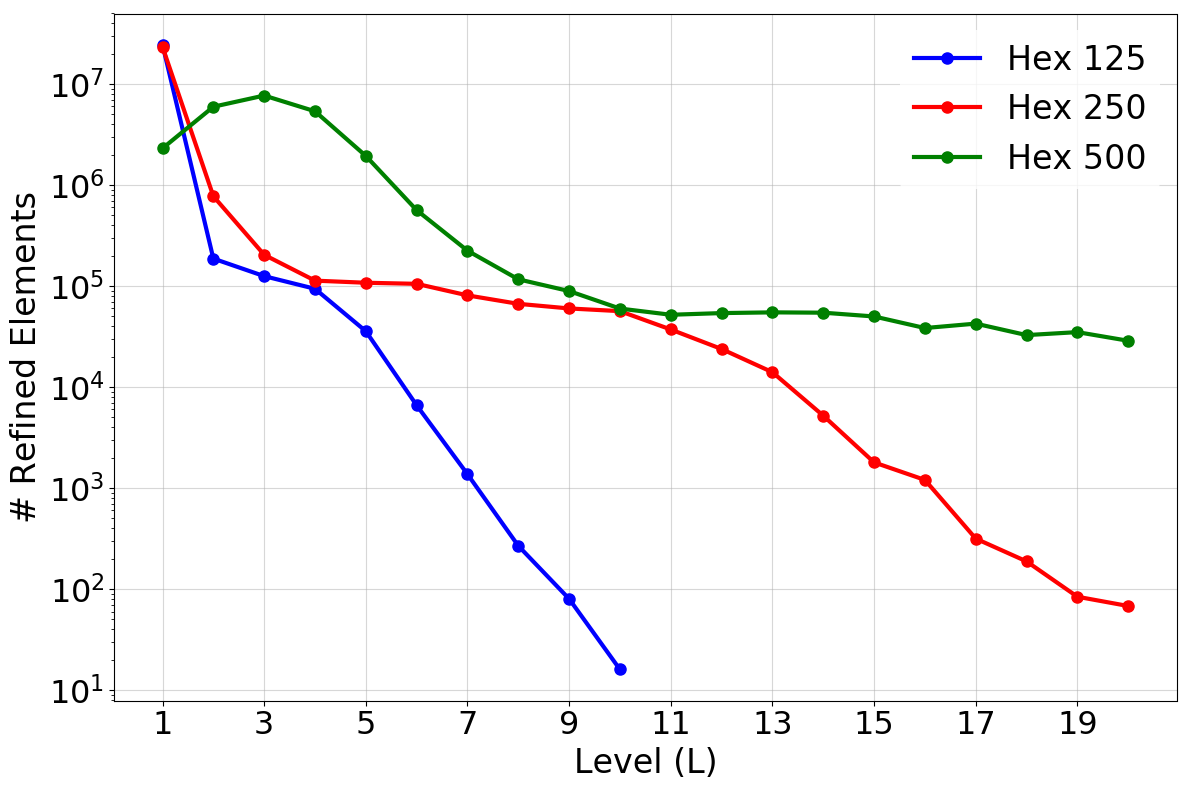

"/home/sriva/git/sfem/workflows/resample/bench_adj/pdf_plots/elements_by_level.pdf"

In [6]:
# # Create the 3x1 histogram plot
# hist_fig = plot_level_histograms(data)

# Optional: Create a line plot showing elements vs level
line_fig = plot_elements_by_level(data, fontsize=24, legend_list=["Hex 125", "Hex 250", "Hex 500"])
save_figure_to_pdf(line_fig, "./pdf_plots/elements_by_level.pdf")


In [7]:
alpha_vec = read_alpha_data("alpha_data_500.dat.gz");

In [8]:
println("Alpha Data Statistics:")
println("=" ^ 50)
println("Maximum:      $(maximum(alpha_vec))")
println("Minimum:      $(minimum(alpha_vec))")
println("Mean:         $(mean(alpha_vec))")
println("Median:       $(median(alpha_vec))")
println("Std Dev:      $(std(alpha_vec))")
println("Count:        $(length(alpha_vec))")
println("=" ^ 50)

Alpha Data Statistics:
Maximum:      16.93549
Minimum:      0.6235536
Mean:         1.9898578923132646
Median:       1.8516405
Std Dev:      0.905389526767074
Count:        24942592


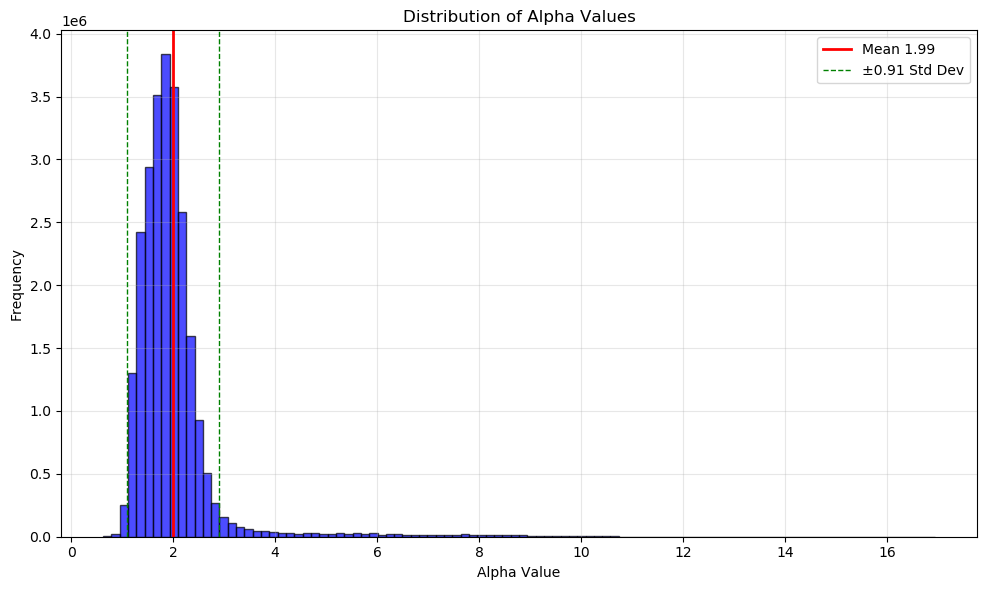

In [9]:
# Or with custom parameters
fig = plot_alpha_histogram(alpha_vec, bins=100, color="blue", show_stats=true)
plt.show()

In [10]:
alpha_vec_125 = read_alpha_data("alpha_data_125.dat.gz");
alpha_vec_250 = read_alpha_data("alpha_data_250.dat.gz");
alpha_vec_500 = read_alpha_data("alpha_data_500.dat.gz");


In [11]:

# Create the table for your three alpha vectors
alpha_vectors = [alpha_vec_125, alpha_vec_250, alpha_vec_500]
labels = ["Alpha 125", "Alpha 250", "Alpha 500"]

alpha_table = alpha_statistics_table(alpha_vectors, labels);
show(stdout, MIME("text/plain"), alpha_table);


3×7 DataFrame
 Row │ Dataset    Mean      Median    Maximum   Minimum   StdDev    Count    
     │ String     Float64   Float64   Float64   Float64   Float64   Int64    
─────┼───────────────────────────────────────────────────────────────────────
   1 │ Alpha 125  0.494474  0.460127   4.20842  0.154951  0.224987  24942592
   2 │ Alpha 250  0.992935  0.923965   8.45077  0.311152  0.451788  24942592
   3 │ Alpha 500  1.98986   1.85164   16.9355   0.623554  0.90539   24942592

In [12]:
using Latexify

# Create the table for your three alpha vectors
alpha_vectors = [alpha_vec_125, alpha_vec_250, alpha_vec_500]
labels = ["Alpha 125", "Alpha 250", "Alpha 500"]

alpha_table = alpha_statistics_table(alpha_vectors, labels);

# Convert to LaTeX table with latex=false for plain text
latex_table = latexify(alpha_table, env=:table, fmt="%.6f", latex=false)
println(latex_table)

# Or save to file
open("alpha_statistics.tex", "w") do file
    write(file, latex_table)
end

\begin{tabular}{ccccccc}
Dataset & Mean & Median & Maximum & Minimum & StdDev & Count\\
Alpha 125 & 0.494474 & 0.460127 & 4.208417 & 0.154951 & 0.224987 & 24942592.000000\\
Alpha 250 & 0.992935 & 0.923965 & 8.450772 & 0.311152 & 0.451788 & 24942592.000000\\
Alpha 500 & 1.989858 & 1.851641 & 16.935490 & 0.623554 & 0.905390 & 24942592.000000\\
\end{tabular}



358